#### Corners Model_3 (Feb 2024)
##### Pre-Processed Data. 63k matches (football-data).
##### Including extra team stat features, experimentation with random forest, scaling and GAM
##### Final Poisson Regression, 2 models used for different thresholds of home/away goal exps.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  



In [197]:
df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Python Analysis\\Leagues_Corners_DF_Prepared.csv', index_col=[0])

In [198]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HC,AC,HC_Lg_Run_Av,AC_Lg_Run_Av,HomeT_HCf_Run_Av,HomeT_HCa_Run_Av,HomeT_ACf_Run_Av,HomeT_ACa_Run_Av,AwayT_HCf_Run_Av,AwayT_HCa_Run_Av,AwayT_ACf_Run_Av,AwayT_ACa_Run_Av,TG,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp,Sup_scld_2.7,Proj_HC,Proj_AC
0,I1,2021-09-11,Napoli,Juventus,2.0,1.0,13.0,1.0,6.23,3.73,2.0,2.0,5.0,4.0,8.0,9.0,3.0,3.0,3.0,0.39,0.28,0.33,0.51,0.49,2.71,1.44,1.27,0.17,0.17,5.25,4.78
1,I1,2021-09-11,Atalanta,Fiorentina,1.0,2.0,10.0,3.0,6.39,3.70,5.0,5.0,1.0,5.0,3.0,3.0,4.0,4.0,3.0,0.60,0.23,0.17,0.63,0.37,3.20,2.29,0.91,1.38,1.64,5.25,4.78
2,I1,2021-09-12,Sampdoria,Inter,2.0,2.0,4.0,4.0,6.29,3.71,8.0,3.0,6.0,8.0,8.0,2.0,4.0,6.0,4.0,0.19,0.23,0.58,0.57,0.43,2.99,0.91,2.08,-1.17,-1.30,5.25,4.78
3,I1,2021-09-12,Cagliari,Genoa,2.0,3.0,2.0,6.0,6.12,3.80,11.0,4.0,3.0,8.0,4.0,5.0,2.0,8.0,5.0,0.45,0.28,0.27,0.52,0.48,2.76,1.63,1.13,0.50,0.51,5.25,4.78
4,I1,2021-09-12,Torino,Salernitana,4.0,0.0,7.0,4.0,6.07,3.85,5.0,1.0,3.0,3.0,1.0,10.0,4.0,9.0,4.0,0.60,0.24,0.17,0.52,0.48,2.76,1.99,0.80,1.19,1.22,5.25,4.78


In [199]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HC', 'AC',
       'HC_Lg_Run_Av', 'AC_Lg_Run_Av', 'HomeT_HCf_Run_Av', 'HomeT_HCa_Run_Av',
       'HomeT_ACf_Run_Av', 'HomeT_ACa_Run_Av', 'AwayT_HCf_Run_Av',
       'AwayT_HCa_Run_Av', 'AwayT_ACf_Run_Av', 'AwayT_ACa_Run_Av', 'TG',
       'HW_%', 'X_%', 'AW_%', 'Ov2.5_%', 'Un2.5_%', 'Exp', 'HG_Exp', 'AG_Exp',
       'Sup Exp', 'Sup_scld_2.7', 'Proj_HC', 'Proj_AC'],
      dtype='object')

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62686 entries, 0 to 62685
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Div               62686 non-null  object 
 1   Date              62686 non-null  object 
 2   HomeTeam          62686 non-null  object 
 3   AwayTeam          62686 non-null  object 
 4   FTHG              62686 non-null  float64
 5   FTAG              62686 non-null  float64
 6   HC                62686 non-null  float64
 7   AC                62686 non-null  float64
 8   HC_Lg_Run_Av      62686 non-null  float64
 9   AC_Lg_Run_Av      62686 non-null  float64
 10  HomeT_HCf_Run_Av  62686 non-null  float64
 11  HomeT_HCa_Run_Av  62686 non-null  float64
 12  HomeT_ACf_Run_Av  62686 non-null  float64
 13  HomeT_ACa_Run_Av  62686 non-null  float64
 14  AwayT_HCf_Run_Av  62686 non-null  float64
 15  AwayT_HCa_Run_Av  62686 non-null  float64
 16  AwayT_ACf_Run_Av  62686 non-null  float6

In [201]:
df.describe()

,FTHG,FTAG,HC,AC,HC_Lg_Run_Av,AC_Lg_Run_Av,HomeT_HCf_Run_Av,HomeT_HCa_Run_Av,HomeT_ACf_Run_Av,HomeT_ACa_Run_Av,AwayT_HCf_Run_Av,AwayT_HCa_Run_Av,AwayT_ACf_Run_Av,AwayT_ACa_Run_Av,TG,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp,Sup_scld_2.7,Proj_HC,Proj_AC
count,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000
mean,1.485707,1.165380,5.712296,4.647465,5.715264,4.673869,5.712393,4.673498,4.674206,5.713537,5.714286,4.673252,4.675888,5.714340,2.651086,0.436222,0.264506,0.299241,0.495979,0.504022,2.669549,1.525673,1.143781,0.381892,0.401783,5.739994,4.652161
std,1.258302,1.122706,2.938747,2.631560,0.438854,0.397762,1.460897,1.298157,1.238531,1.401350,1.397874,1.239823,1.295993,1.466942,1.640511,0.150320,0.040137,0.135733,0.069156,0.069155,0.294809,0.484656,0.411604,0.849431,0.984471,0.403506,0.339935
min,0.000000,0.000000,0.000000,0.000000,3.810000,2.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.050000,0.020000,0.280000,0.140000,1.840000,0.220000,0.180000,-3.850000,-6.700000,4.310000,3.470000
25%,1.000000,0.000000,4.000000,3.000000,5.420000,4.420000,4.810000,3.890000,3.890000,4.860000,4.830000,3.920000,3.880000,4.830000,1.000000,0.340000,0.260000,0.210000,0.450000,0.470000,2.470000,1.240000,0.890000,-0.050000,-0.050000,5.460000,4.450000
50%,1.000000,1.000000,5.000000,4.000000,5.770000,4.700000,5.640000,4.620000,4.620000,5.670000,5.640000,4.620000,4.620000,5.670000,2.000000,0.430000,0.280000,0.290000,0.480000,0.520000,2.600000,1.450000,1.090000,0.360000,0.330000,5.800000,4.700000
75%,2.000000,2.000000,7.000000,6.000000,6.020000,4.950000,6.530000,5.410000,5.380000,6.530000,6.500000,5.400000,5.400000,6.560000,4.000000,0.520000,0.290000,0.370000,0.530000,0.550000,2.790000,1.730000,1.320000,0.820000,0.800000,6.060000,4.900000
max,10.000000,13.000000,24.000000,21.000000,7.420000,6.690000,20.000000,17.000000,17.000000,17.000000,20.000000,16.000000,17.000000,20.000000,13.000000,0.920000,0.660000,0.900000,0.860000,0.720000,4.850000,4.610000,4.300000,4.360000,7.830000,6.650000,5.240000


In [202]:
df['Div'].unique()

array(['I1', 'E0', 'D1', 'SP1', 'F1', 'SC0', 'N1', 'P1', 'B1', 'E1', 'T1',
       'G1', 'E2', 'E3'], dtype=object)

In [203]:
df.isna().sum()

Div                 0
Date                0
HomeTeam            0
AwayTeam            0
FTHG                0
FTAG                0
HC                  0
AC                  0
HC_Lg_Run_Av        0
AC_Lg_Run_Av        0
HomeT_HCf_Run_Av    0
HomeT_HCa_Run_Av    0
HomeT_ACf_Run_Av    0
HomeT_ACa_Run_Av    0
AwayT_HCf_Run_Av    0
AwayT_HCa_Run_Av    0
AwayT_ACf_Run_Av    0
AwayT_ACa_Run_Av    0
TG                  0
HW_%                0
X_%                 0
AW_%                0
Ov2.5_%             0
Un2.5_%             0
Exp                 0
HG_Exp              0
AG_Exp              0
Sup Exp             0
Sup_scld_2.7        0
Proj_HC             0
Proj_AC             0
dtype: int64

<AxesSubplot:>

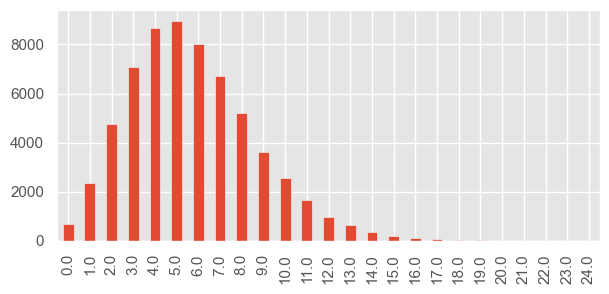

In [204]:
# show distribution of HC
df['HC'].value_counts().sort_index().plot(kind='bar', figsize=(7, 3))

Positively skewed, not normally distributed. Test for confirmation.
Shapiro_Wilk test to show extent of normality

In [205]:
from scipy.stats import shapiro

statistic, p_value = shapiro(df['HC'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value},")

# Check if the p-value is less than the significance level (commonly 0.05)
# if less than 5% we reject the null hypothesis that the data follows a normal distribution

if p_value < 0.05:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

Shapiro-Wilk Test Statistic: 0.9637942314147949
P-value: 0.0,
The data does not follow a normal distribution.


C:\Users\MikeD\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Is the data poisson distributed? Compare with a poisson PMF

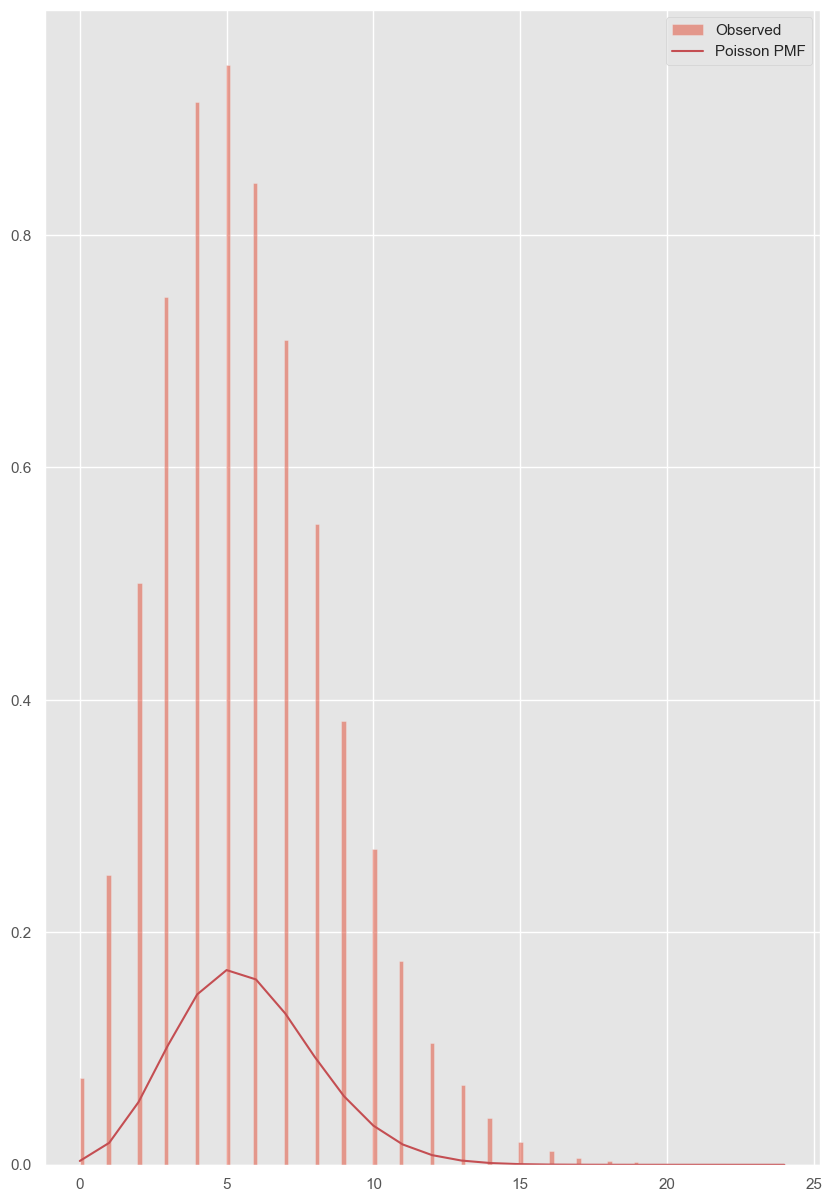

In [206]:
from scipy.stats import poisson

data = df['HC']
mu = data.mean()

plt.hist(data, bins='auto', density=True, alpha=0.5, label='Observed')
x = np.arange(0, max(data) + 1)
plt.plot(x, poisson.pmf(x, mu), 'r-', label='Poisson PMF')
plt.legend()
plt.show()

- Q-Q Plot Test for Poisson

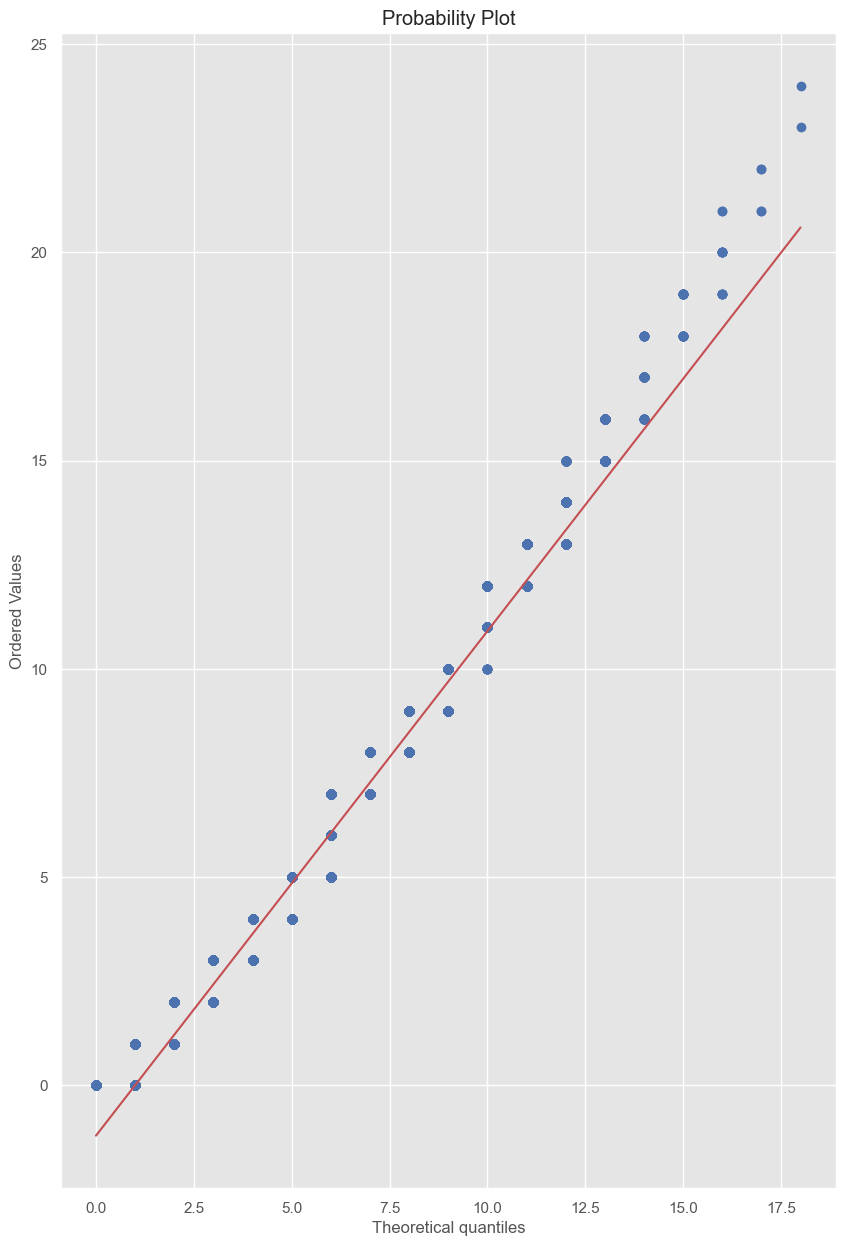

In [207]:
from scipy.stats import probplot

probplot(data, dist='poisson', sparams=(mu,), plot=plt)
plt.show()

The deviation observed in the Q-Q plot, where the points diverge from the straight line towards the right extreme, may indicate that the tail of the data distribution is heavier than what a Poisson distribution would predict. This suggests the presence of overdispersion, which occurs when the observed variability in the data is greater than what is expected from a Poisson distribution.

In the context of count data, overdispersion can often be addressed by considering alternative probability distributions that allow for greater variability. One such distribution is the Negative Binomial distribution, which is an extension of the Poisson distribution with an additional parameter to account for overdispersion.

- Chi-Sq Test for Poisson

In [208]:
from scipy.stats import poisson, chisquare

data = df['HC']

# Specify the expected Poisson distribution based on your data
expected_counts = np.histogram(data, bins='auto')[0]

# Perform the chi-squared goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=expected_counts)

# Check the p-value to determine the result of the test
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Data does not follow a Poisson distribution.")
else:
    print("Fail to reject the null hypothesis: Data follows a Poisson distribution.")

print("p_value:", round(p_value,4))

Reject the null hypothesis: Data does not follow a Poisson distribution.
p_value: 0.0


- Test for Negative Binomial

In [209]:
from scipy.stats import nbinom, poisson, chi2
from scipy.optimize import minimize

data = df['HC']

# Define the negative log-likelihood function for Poisson distribution
def neg_log_likelihood_poisson(params, data):
    mu = params[0]
    return -poisson.logpmf(data, mu).sum()

# Define the negative log-likelihood function for Negative Binomial distribution
def neg_log_likelihood_nbinom(params, data):
    r, p = params
    return -nbinom.logpmf(data, r, p).sum()

# Initial guesses for parameters
initial_params_poisson = [data.mean()]
initial_params_nbinom = [1, 0.5]

# Fit Poisson and Negative Binomial distributions
poisson_params = minimize(neg_log_likelihood_poisson, initial_params_poisson, args=(data,), method='L-BFGS-B').x
nbinom_params = minimize(neg_log_likelihood_nbinom, initial_params_nbinom, args=(data,), method='L-BFGS-B').x

# Calculate the log-likelihoods for both distributions
poisson_ll = -neg_log_likelihood_poisson(poisson_params, data)
nbinom_ll = -neg_log_likelihood_nbinom(nbinom_params, data)

# Calculate the likelihood ratio test statistic
lrt_statistic = -2 * (poisson_ll - nbinom_ll)

# Degrees of freedom is the difference in the number of parameters between the models
df_degrees_of_freedom = len(nbinom_params) - len(poisson_params)

# Print information about the data and test
print("Likelihood Ratio Test Statistic:", lrt_statistic)
print("Degrees of Freedom:", df_degrees_of_freedom)

# Calculate the p-value using the chi2 distribution
p_value = chi2.sf(lrt_statistic, df_degrees_of_freedom)

# Check the p-value to determine the result of the test
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Negative Binomial is a better fit than Poisson.")
else:
    print("Fail to reject the null hypothesis: Poisson is a sufficient model.")


Likelihood Ratio Test Statistic: -269507.8724246636
Degrees of Freedom: 1
Fail to reject the null hypothesis: Poisson is a sufficient model.


Proceed with assumption that Poisson is an adequate representation of our corners distribution

#### Observe best correlated features with home corners

In [210]:
df.corr()['HC'].sort_values()

AW_%               -0.270809
AG_Exp             -0.254435
AC                 -0.199175
X_%                -0.116371
Un2.5_%            -0.081020
HomeT_ACa_Run_Av   -0.069125
AwayT_ACf_Run_Av   -0.066462
AwayT_HCf_Run_Av   -0.064477
HomeT_HCa_Run_Av   -0.060963
FTAG               -0.021117
TG                 -0.015435
FTHG               -0.001283
AC_Lg_Run_Av        0.067273
Proj_AC             0.075546
Exp                 0.080877
Ov2.5_%             0.081022
Proj_HC             0.100526
HomeT_ACf_Run_Av    0.144858
AwayT_HCa_Run_Av    0.144940
HomeT_HCf_Run_Av    0.147546
AwayT_ACa_Run_Av    0.150182
HC_Lg_Run_Av        0.151581
HG_Exp              0.265147
Sup_scld_2.7        0.266303
Sup Exp             0.274574
HW_%                0.275450
HC                  1.000000
Name: HC, dtype: float64

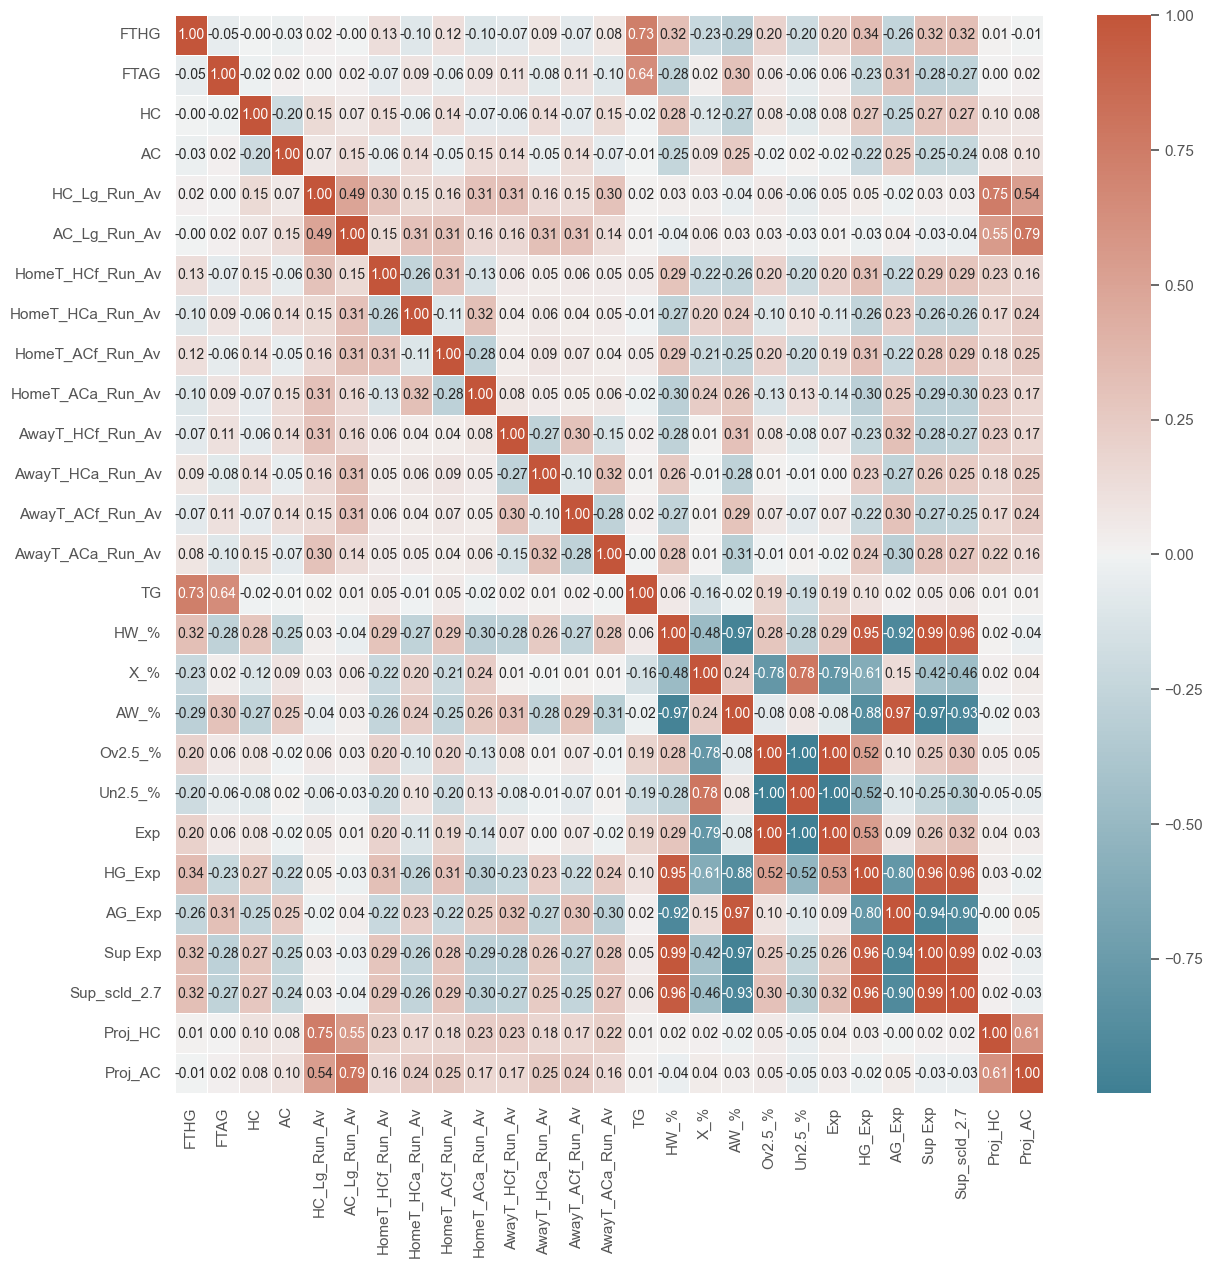

In [211]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 14))

# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

#### Feature Selection
 - Select features based on correlation to HC and not being correlated with each other
 - Keep: HG_Exp, AG_Exp, HomeT_HCf_Run_Av, HomeT_HCa_Run_Av, HomeT_ACf_Run_Av, HomeT_ACa_Run_Av, AwayT_ACf_Run_Av, AwayT_ACa_Run_Av, AwayT_HCf_Run_Av, AwayT_HCa_Run_Av, HC_Lg_Run_Av, AC_Lg_Run_Av.
 - Check distributions of the selected features

<AxesSubplot:ylabel='Frequency'>

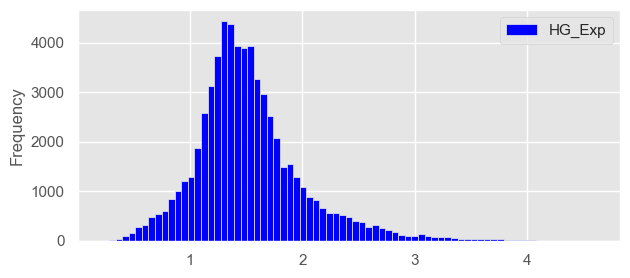

In [212]:
df.plot(kind='hist', y='HG_Exp', bins=75,figsize=(7,3), color = 'blue')

<AxesSubplot:ylabel='Frequency'>

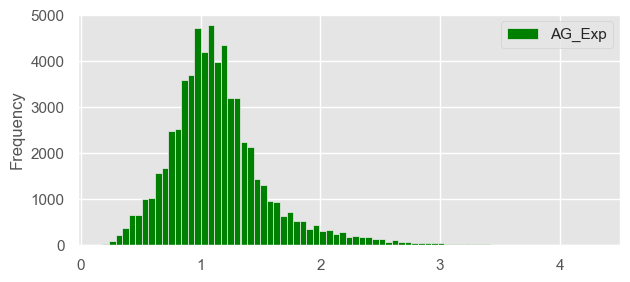

In [213]:
df.plot(kind='hist', y='AG_Exp', bins=75,figsize=(7,3), color='green')

<AxesSubplot:ylabel='Frequency'>

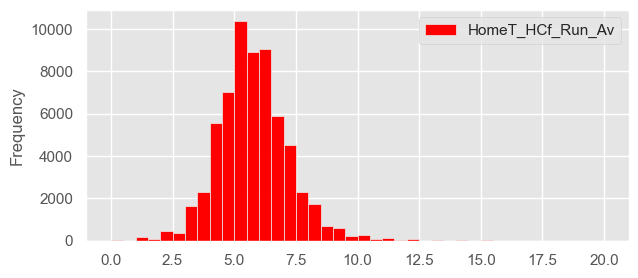

In [214]:
df.plot(kind='hist', y='HomeT_HCf_Run_Av', bins=40,figsize=(7,3), color='red')

<AxesSubplot:ylabel='Frequency'>

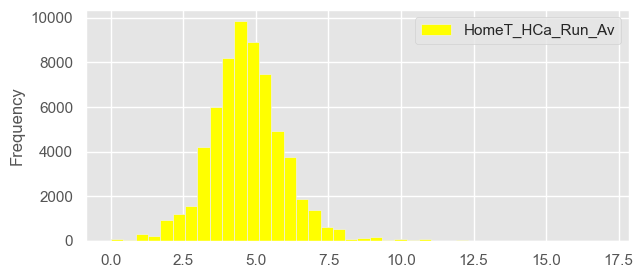

In [215]:
df.plot(kind='hist', y='HomeT_HCa_Run_Av', bins=40,figsize=(7,3), color='yellow')

<AxesSubplot:ylabel='Frequency'>

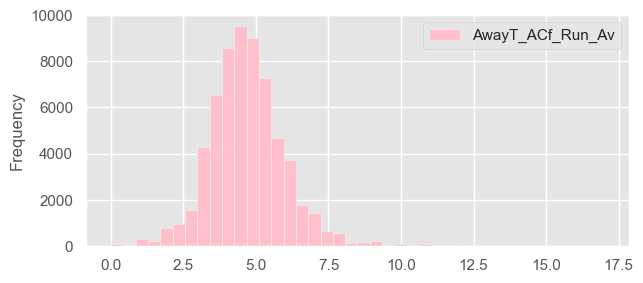

In [216]:
df.plot(kind='hist', y='AwayT_ACf_Run_Av', bins=40,figsize=(7,3), color='pink')

<AxesSubplot:ylabel='Frequency'>

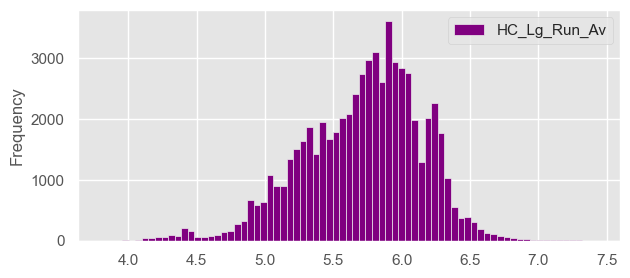

In [217]:
df.plot(kind='hist', y='HC_Lg_Run_Av', bins=75,figsize=(7,3), color='purple')

##### Above chart with slight negative skew - possibly due to using running league average corners despite removing first n matches in pre-processing. Using previous season/s average/s could be better alternative.


#### Plot selected features versus HC to show relationship

<AxesSubplot:xlabel='Sup_scld_2.7', ylabel='HC'>

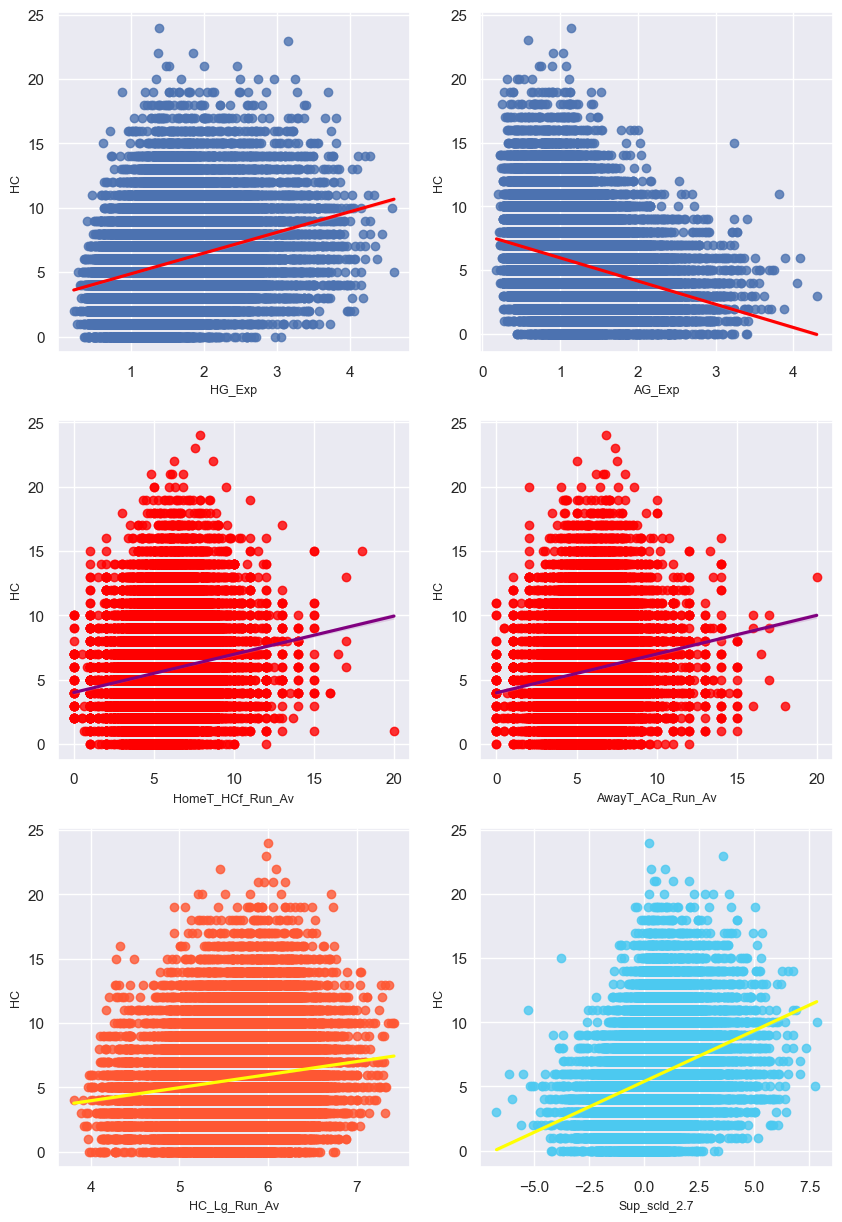

In [218]:
sns.set(rc = {'figure.figsize':(10,15), # width,length
              'axes.labelsize':9})
fig,axes = plt.subplots(3,2)

sns.regplot(data=df, x='HG_Exp', y='HC', ax=axes[0,0], line_kws={'color':'red'})
sns.regplot(data=df, x='AG_Exp', y='HC', ax=axes[0,1], line_kws={'color':'red'})
sns.regplot(data=df, x='HomeT_HCf_Run_Av', y='HC', ax=axes[1,0], scatter_kws={'color': (1, 0, 0)}, line_kws={'color':'purple'})
sns.regplot(data=df, x='AwayT_ACa_Run_Av', y='HC', ax=axes[1,1], scatter_kws={'color': (1, 0, 0)}, line_kws={'color':'purple'})
sns.regplot(data=df, x='HC_Lg_Run_Av', y='HC', ax=axes[2,0], scatter_kws={'color': '#FF5733'}, line_kws={'color':'yellow'})
sns.regplot(data=df, x='Sup_scld_2.7', y='HC', ax=axes[2,1], scatter_kws={'color': '#4CC9F0'}, line_kws={'color':'yellow'})


#### Correlated features vs HC using binned data to better observe relationship

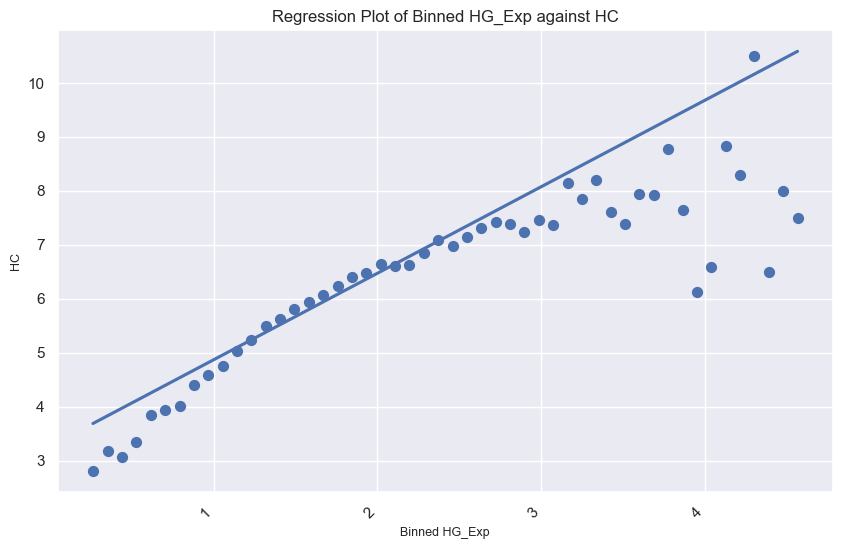

In [219]:
# create new df
data = df[['HG_Exp', 'HC']]

# Specify the number of bins
num_bins = 50

# Create a new column with binned values
df['HG_Exp_bins'] = pd.cut(df['HG_Exp'], bins=num_bins)

# Calculate the midpoint of each bin
bin_midpoints = df['HG_Exp_bins'].apply(lambda x: x.mid).astype(float)

# Create a regression plot with binned values
plt.figure(figsize=(10, 6))
sns.regplot(x=bin_midpoints, y='HC', data=df, x_estimator=np.mean, ci=None)

# Add labels and title
plt.xlabel('Binned HG_Exp')
plt.ylabel('HC')
plt.title('Regression Plot of Binned HG_Exp against HC')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

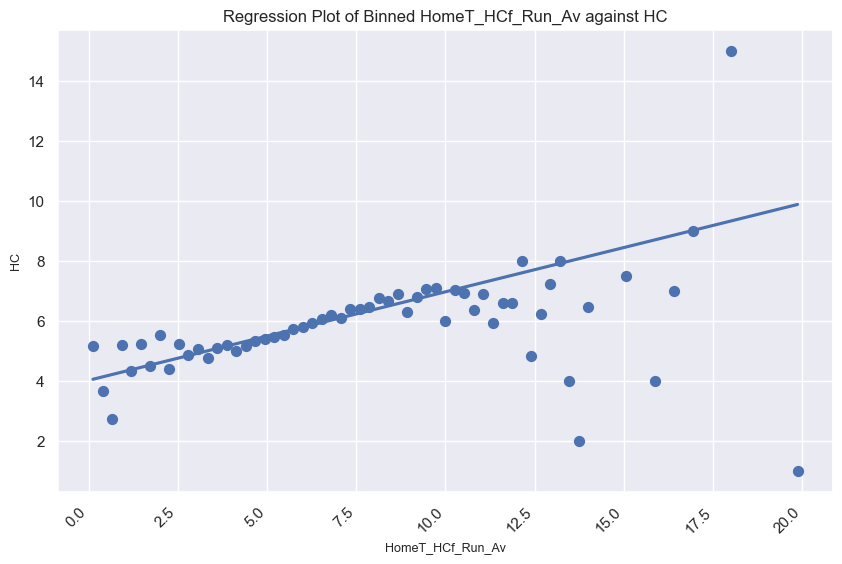

In [220]:
data = df[['HomeT_HCf_Run_Av', 'HC']]

# Specify the number of bins
num_bins = 75

# Create a new column with binned values
df['HomeT_HCf_Run_Av_bins'] = pd.cut(df['HomeT_HCf_Run_Av'], bins=num_bins)

# Calculate the midpoint of each bin
bin_midpoints = df['HomeT_HCf_Run_Av_bins'].apply(lambda x: x.mid).astype(float)

# Create a regression plot with binned values
plt.figure(figsize=(10, 6))
sns.regplot(x=bin_midpoints, y='HC', data=df, x_estimator=np.mean, ci=None)

# Add labels and title
plt.xlabel('HomeT_HCf_Run_Av')
plt.ylabel('HC')
plt.title('Regression Plot of Binned HomeT_HCf_Run_Av against HC')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### Polynomial fit for HC vs Binned_HG_Exp

In [221]:
# New df and bin the HG_Exp

df_hgx_hc = df[['HC', 'HG_Exp']]

bin_width = 0.05
min_value = 0
max_value = 3.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df_hgx_hc['HG_Exp_Bin'] = pd.cut(df_hgx_hc['HG_Exp'], bins=bins, labels=labels, right=False, ordered=False)

# Ensure that 'HG_Exp_Bin' is converted to float for later use
df_hgx_hc['HG_Exp_Bin'] = df_hgx_hc['HG_Exp_Bin'].astype('float')

# Use groupby without resetting the index to avoid potential issues
group_df_hgx_hc = df_hgx_hc.groupby('HG_Exp_Bin', as_index=False)['HC'].mean()

# Use groupby without resetting the index to avoid potential issues
group_df_hgx_hc = df_hgx_hc.groupby('HG_Exp_Bin', as_index=False)['HC'].mean()

         2
-0.4456 x + 3.246 x + 1.846


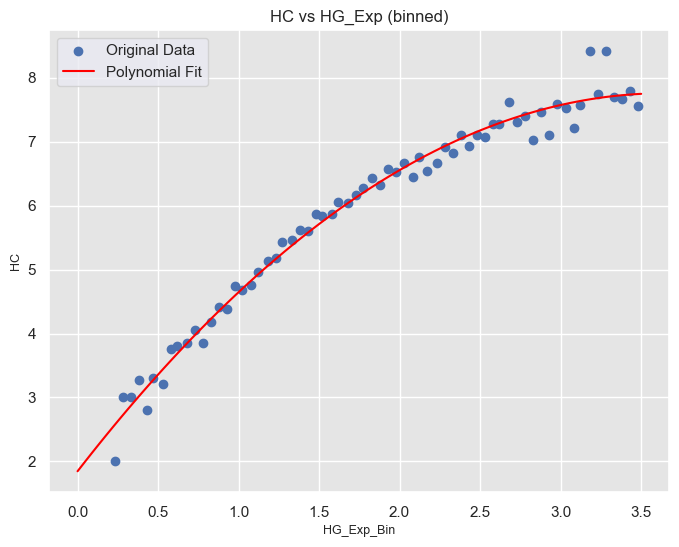

In [222]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0, 3.5, 80)
    y_new = model(x_new)

    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Scatter plot of the original data points
    plt.scatter(ind_var, dep_var, label='Original Data')

    # Plot the polynomial trendline
    plt.plot(x_new, y_new, label='Polynomial Fit', color='red')

    plt.title('HC vs HG_Exp (binned)')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    plt.xlabel(Name)
    plt.ylabel('HC')
    plt.legend()  # Show legend with labels

    plt.show()
    plt.close()
    
# Example usage
x = group_df_hgx_hc['HG_Exp_Bin']
y = group_df_hgx_hc['HC']

# declare poly degree
degree = 2

f = np.polyfit(x, y, degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function
PlotPolly(p, x, y, 'HG_Exp_Bin')

Relationships are all curved with clear polynomial trends

# _________________________________________________________________________________

#### Model the data with Poisson Regression

- Split data into Train and Test groups and apply poisson regression, testing different combinations of features
- Compare Pseudo R2 values as metric to determine best features combination
#### Train_1

In [223]:
import statsmodels.api as sm
import statsmodels.tools as sm_tools

#Split data separating the independent and target variables
y_data = df['HC']
X_data = df[['HG_Exp',
             'AG_Exp', 
             'HomeT_HCf_Run_Av', 
             'HomeT_HCa_Run_Av',
             'HomeT_ACf_Run_Av', 
             'HomeT_ACa_Run_Av', 
             'AwayT_ACf_Run_Av', 
             'AwayT_ACa_Run_Av',
             'AwayT_HCf_Run_Av',
             'AwayT_HCa_Run_Av',
             'HC_Lg_Run_Av',
             'AC_Lg_Run_Av']]

# Add a constant term to the design matrix
X_data = sm.add_constant(X_data)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=0)

y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

print('number of test samples :', X_test.shape[0])
print('number of training samples :', X_train.shape[0])

number of test samples : 12538
number of training samples : 50148


In [225]:
#import statsmodels.api as sm
#from sklearn.model_selection import train_test_split

# Fit the Poisson regression model on the training data
# The sm.GLM class from statsmodels is used for generalized linear models, and we specify family=sm.families.Poisson() to indicate that we want a Poisson regression.
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Display the summary of the model
print(poisson_model.summary())

# Assess the model on the test set
y_pred_test = poisson_model.predict(X_test)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                     HC   No. Observations:                50148
Model:                            GLM   Df Residuals:                    50135
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2148e+05
Date:                Wed, 31 Jan 2024   Deviance:                       69994.
Time:                        14:49:12   Pearson chi2:                 6.76e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1469
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7649      0.033  

The Pseudo R-squared (0.147) suggests that the model explains approximately 14.7% of the variance in the data. 

Example prediction:

In [226]:
import statsmodels.tools as sm_tools

# Input values
HG = 2.2
AG = 0.5
HTHCF = 5.5
HTHCa = 2.4
HTACf = 4.5
HTACa = 2.5
ATACf = 3.8
ATACa = 5
ATHCf = 4
ATHCa = 4
Lg_Av_HC = 4.6
Lg_Av_AC = 3.8

# Create a DataFrame with the input values
x_new = pd.DataFrame({'const':1, 
                      'HG_Exp': [HG], 
                      'AG_Exp': [AG], 
                      'HomeT_HCf_Run_Av': [HTHCF],
                      'HomeT_HCa_Run_Av': [HTHCa], 
                      'HomeT_ACf_Run_Av': [HTACf],
                      'HomeT_ACa_Run_Av' : [HTACa],                    
                      'AwayT_ACf_Run_Av' : [ATACf], 
                      'AwayT_ACa_Run_Av': [ATACa],
                      'AwayT_HCf_Run_Av': [ATHCf],
                      'AwayT_HCa_Run_Av': [ATHCa],
                      'HC_Lg_Run_Av': [Lg_Av_HC],
                      'AC_Lg_Run_Av' : [Lg_Av_AC]})


# Use the trained model to make predictions on the new data
predicted_HC = poisson_model.predict(x_new)

print('Predicted HC:', predicted_HC)

Predicted HC: 0    5.830652
dtype: float64


#### Train_2 - For HG_Exp < 2.4 and with outliers removed

In [227]:
# Create new df with rows where 'HG_Exp' is greater than 2
df_2 = df[df['HG_Exp'] < 2.4]
df_2.reset_index(drop=True, inplace=True)

In [228]:
df_2.shape

(59096, 33)

In [229]:
# remove outliers where HC exceeds 3 sd
from scipy.stats import zscore

# Calculate z-scores for 'HC'
z_scores = zscore(df_2['HC'])

# Define a threshold for z-scores (e.g., removing data points beyond 3 standard deviations)
threshold = 3

# Create a new DataFrame with outliers removed
df_2 = df_2[(z_scores > -threshold) & (z_scores < threshold)]

# Reset the index of the new DataFrame
df_2.reset_index(drop=True, inplace=True)

In [230]:
df_2.shape

(58770, 33)

In [231]:
#Split data separating the independent and target variables
y_data_2 = df_2['HC']
X_data_2 = df_2[['HG_Exp',
             'AG_Exp', 
             'HomeT_HCf_Run_Av', 
             'HomeT_HCa_Run_Av',
             'HomeT_ACf_Run_Av', 
             'HomeT_ACa_Run_Av', 
             'AwayT_ACf_Run_Av', 
             'AwayT_ACa_Run_Av',
             'AwayT_HCf_Run_Av',
             'AwayT_HCa_Run_Av',
             'HC_Lg_Run_Av',
             'AC_Lg_Run_Av']]

# Add a constant term to the design matrix
X_data_2 = sm.add_constant(X_data_2)

In [232]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_data_2, y_data_2, test_size=0.20, random_state=0)

y_train_2 = y_train_2.reset_index(drop=True)
X_train_2 = X_train_2.reset_index(drop=True)

print('number of test samples :', X_test_2.shape[0])
print('number of training samples :', X_train_2.shape[0])

number of test samples : 11754
number of training samples : 47016


In [233]:
# Fit the Poisson regression model on the training data
# The sm.GLM class from statsmodels is used for generalized linear models, and we specify family=sm.families.Poisson() to indicate that we want a Poisson regression.
poisson_model_2 = sm.GLM(y_train_2, X_train_2, family=sm.families.Poisson()).fit()

# Display the summary of the model
print(poisson_model_2.summary())

# Assess the model on the test set
y_pred_test_2 = poisson_model_2.predict(X_test_2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     HC   No. Observations:                47016
Model:                            GLM   Df Residuals:                    47003
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1203e+05
Date:                Wed, 31 Jan 2024   Deviance:                       63007.
Time:                        14:49:32   Pearson chi2:                 6.00e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1166
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7062      0.035  

In [234]:
#import statsmodels.tools as sm_tools

# Input values
HG = 2.5
AG = 0.5
HTHCF = 5.5
HTHCa = 2.4
HTACf = 4.5
HTACa = 2.5
ATACf = 3.8
ATACa = 5
ATHCf = 4
ATHCa = 4
Lg_Av_HC = 4.6
Lg_Av_AC = 3.8

# Create a DataFrame with the input values
x_new_2 = pd.DataFrame({'const': 1, 
                      'HG_Exp': [HG], 
                      'AG_Exp': [AG], 
                      'HomeT_HCf_Run_Av': [HTHCF],
                      'HomeT_HCa_Run_Av': [HTHCa], 
                      'HomeT_ACf_Run_Av': [HTACf],
                      'HomeT_ACa_Run_Av' : [HTACa],                    
                      'AwayT_ACf_Run_Av' : [ATACf], 
                      'AwayT_ACa_Run_Av': [ATACa],
                      'AwayT_HCf_Run_Av': [ATHCf],
                      'AwayT_HCa_Run_Av': [ATHCa],
                      'HC_Lg_Run_Av': [Lg_Av_HC],
                      'AC_Lg_Run_Av' : [Lg_Av_AC]})


# Use the trained model to make predictions on the new data
predicted_HC_2 = poisson_model_2.predict(x_new_2)
print(predicted_HC_2)

0    6.115208
dtype: float64


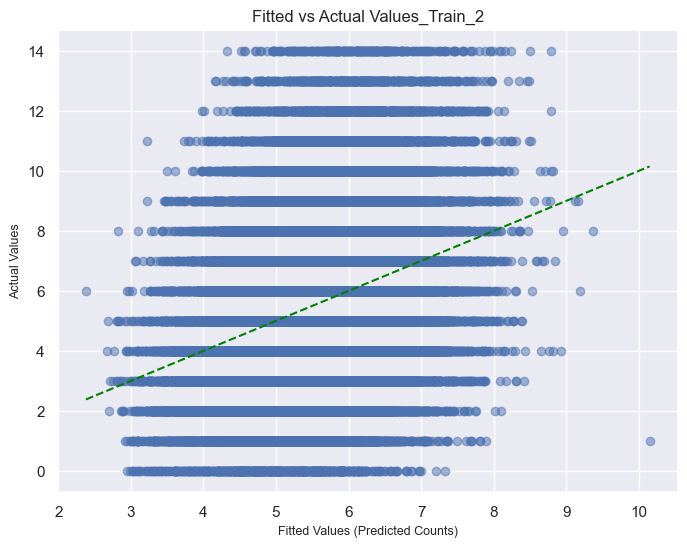

In [235]:
predicted_values_2 = poisson_model_2.predict(X_data_2)
residuals_2 = y_data_2 - predicted_values_2

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values_2, y_data_2, alpha=0.5)
plt.plot([min(predicted_values_2), max(predicted_values_2)], [min(predicted_values_2), max(predicted_values_2)], color='green', linestyle='--')
plt.xlabel('Fitted Values (Predicted Counts)')
plt.ylabel('Actual Values')
plt.title('Fitted vs Actual Values_Train_2')
plt.show()

#### Train_3 - For HG_Exp > 2.4 and with outliers removed

In [236]:
# Create new df with rows where 'HG_Exp' is greater than 2
df_3 = df[df['HG_Exp'] > 2.4]
df_3.reset_index(drop=True, inplace=True)

# remove outliers where HC exceeds 3 sd
#from scipy.stats import zscore

# Calculate z-scores for 'HC'
z_scores = zscore(df_3['HC'])

# Define a threshold for z-scores (e.g., removing data points beyond 3 standard deviations)
threshold = 3

# Create a new DataFrame with outliers removed
df_3 = df_3[(z_scores > -threshold) & (z_scores < threshold)]

# Reset the index of the new DataFrame
df_3.reset_index(drop=True, inplace=True)

#Split data separating the independent and target variables
y_data_3 = df_3['HC']
X_data_3 = df_3[['HG_Exp',
             'AG_Exp', 
             'HomeT_HCf_Run_Av', 
             'HomeT_HCa_Run_Av',
             'HomeT_ACf_Run_Av', 
             'HomeT_ACa_Run_Av', 
             'AwayT_ACf_Run_Av', 
             'AwayT_ACa_Run_Av',
             'AwayT_HCf_Run_Av',
             'AwayT_HCa_Run_Av',
             'HC_Lg_Run_Av',
             'AC_Lg_Run_Av']]

# Add a constant term to the design matrix
X_data_3 = sm.add_constant(X_data_3)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_data_3, y_data_3, test_size=0.20, random_state=0)

y_train_3 = y_train_3.reset_index(drop=True)
X_train_3 = X_train_3.reset_index(drop=True)

print('number of test samples :', X_test_3.shape[0])
print('number of training samples :', X_train_3.shape[0])

# Fit the Poisson regression model on the training data
# The sm.GLM class from statsmodels is used for generalized linear models, and we specify family=sm.families.Poisson() to indicate that we want a Poisson regression.
poisson_model_3 = sm.GLM(y_train_3, X_train_3, family=sm.families.Poisson()).fit()

# Display the summary of the model
print(poisson_model_3.summary())

# Assess the model on the test set
y_pred_test_3 = poisson_model_3.predict(X_test_3)

number of test samples : 697
number of training samples : 2785
                 Generalized Linear Model Regression Results                  
Dep. Variable:                     HC   No. Observations:                 2785
Model:                            GLM   Df Residuals:                     2772
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7178.8
Date:                Wed, 31 Jan 2024   Deviance:                       3955.7
Time:                        14:49:41   Pearson chi2:                 3.81e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05969
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [262]:
#import statsmodels.tools as sm_tools

# Input values
HG = 2.5
AG = 0.5
HTHCF = 5.5
HTHCa = 2.4
HTACf = 4.5
HTACa = 2.5
ATACf = 3.8
ATACa = 5
ATHCf = 4
ATHCa = 4
Lg_Av_HC = 4.6
Lg_Av_AC = 3.8

# Create a DataFrame with the input values
x_new_3 = pd.DataFrame({'const':1, 
                      'HG_Exp': [HG], 
                      'AG_Exp': [AG], 
                      'HomeT_HCf_Run_Av': [HTHCF],
                      'HomeT_HCa_Run_Av': [HTHCa], 
                      'HomeT_ACf_Run_Av': [HTACf],
                      'HomeT_ACa_Run_Av' : [HTACa],                    
                      'AwayT_ACf_Run_Av' : [ATACf], 
                      'AwayT_ACa_Run_Av': [ATACa],
                      'AwayT_HCf_Run_Av': [ATHCf],
                      'AwayT_HCa_Run_Av': [ATHCa],
                      'HC_Lg_Run_Av': [Lg_Av_HC],
                      'AC_Lg_Run_Av' : [Lg_Av_AC]})


# Use the trained model to make predictions on the new data
predicted_HC_3 = poisson_model_3.predict(x_new_3)
print(predicted_HC_3)

0    7.057098
dtype: float64


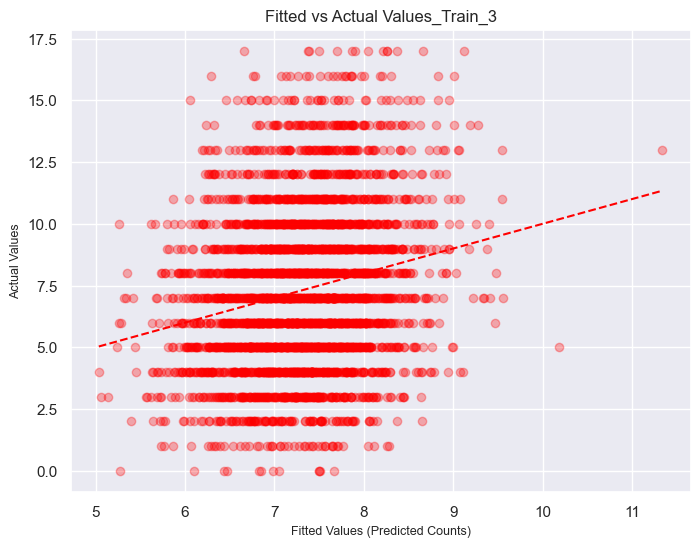

In [238]:
predicted_values_3 = poisson_model_3.predict(X_data_3)
residuals_3 = y_data_3 - predicted_values_3

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values_3, y_data_3, color = 'red', alpha=0.3)
#plt.scatter(predicted_values_2, y_data_2, color = 'green', alpha=0.3)
plt.plot([min(predicted_values_3), max(predicted_values_3)], [min(predicted_values_3), max(predicted_values_3)], color='red', linestyle='--')
#plt.plot([min(predicted_values_2), max(predicted_values_2)], [min(predicted_values_2), max(predicted_values_2)], color='green', linestyle='--')
plt.xlabel('Fitted Values (Predicted Counts)')
plt.ylabel('Actual Values')
plt.title('Fitted vs Actual Values_Train_3')
plt.show()

In [244]:
print("Model 1 Coefficients:")
print(poisson_model.params)

print("Model 2 Coefficients:")
print(poisson_model_2.params)

print("\nModel 3 Coefficients:")
print(poisson_model_3.params)

Model 1 Coefficients:
const               0.764889
HG_Exp              0.094142
AG_Exp             -0.173521
HomeT_HCf_Run_Av    0.009138
HomeT_HCa_Run_Av    0.000576
HomeT_ACf_Run_Av    0.018340
HomeT_ACa_Run_Av   -0.010798
AwayT_ACf_Run_Av   -0.003077
AwayT_ACa_Run_Av    0.010077
AwayT_HCf_Run_Av   -0.010109
AwayT_HCa_Run_Av    0.023106
HC_Lg_Run_Av        0.167070
AC_Lg_Run_Av       -0.023289
dtype: float64
Model 2 Coefficients:
const               0.706217
HG_Exp              0.136668
AG_Exp             -0.136309
HomeT_HCf_Run_Av    0.006939
HomeT_HCa_Run_Av    0.000527
HomeT_ACf_Run_Av    0.019490
HomeT_ACa_Run_Av   -0.010533
AwayT_ACf_Run_Av   -0.001488
AwayT_ACa_Run_Av    0.009643
AwayT_HCf_Run_Av   -0.009301
AwayT_HCa_Run_Av    0.020752
HC_Lg_Run_Av        0.167351
AC_Lg_Run_Av       -0.033667
dtype: float64

Model 3 Coefficients:
const               1.472455
HG_Exp             -0.007011
AG_Exp             -0.303107
HomeT_HCf_Run_Av    0.010680
HomeT_HCa_Run_Av    0.002544
Home

#### Compare all 3 models predicting HC with changing HG_Exp

In [263]:

# Input values
AG = 0.4
HTHCF = 7
HTHCa = 2.0
HTACf = 4.5
HTACa = 2.5
ATACf = 3.8
ATACa = 5
ATHCf = 4
ATHCa = 4
Lg_Av_HC = 4.6
Lg_Av_AC = 3.8

# Create a DataFrame with the input values
x_df = pd.DataFrame({'const': 1, 
                     'HG_Exp': [HG], 
                     'AG_Exp': [AG], 
                     'HomeT_HCf_Run_Av': [HTHCF],
                     'HomeT_HCa_Run_Av': [HTHCa], 
                     'HomeT_ACf_Run_Av': [HTACf],
                     'HomeT_ACa_Run_Av': [HTACa],                    
                     'AwayT_ACf_Run_Av': [ATACf], 
                     'AwayT_ACa_Run_Av': [ATACa],
                     'AwayT_HCf_Run_Av': [ATHCf],
                     'AwayT_HCa_Run_Av': [ATHCa],
                     'HC_Lg_Run_Av': [Lg_Av_HC],
                     'AC_Lg_Run_Av': [Lg_Av_AC]})

# Loop through different values of 'HG_Exp'
for hg in np.arange(2.1, 3.8, 0.1):
    # Update the 'HG_Exp' column in the DataFrame
    x_df['HG_Exp'] = hg
    
    # Use the trained model to make predictions on the new data
    predicted_HC_1 = poisson_model.predict(x_df)
    predicted_HC_2 = poisson_model_2.predict(x_df)
    predicted_HC_3 = poisson_model_3.predict(x_df)
    
    print(f'Pred HC_1 for HG_{round(hg,1)}: {round(predicted_HC_1,2)}')
    print(f'Pred HC_2 for HG_{round(hg,1)}: {round(predicted_HC_2,2)}')
    print(f'Pred HC_3 for HG_{round(hg,1)}: {round(predicted_HC_3,2)}')
    print("-------------------")


Pred HC_1 for HG_2.1: 0    5.96
dtype: float64
Pred HC_2 for HG_2.1: 0    5.93
dtype: float64
Pred HC_3 for HG_2.1: 0    6.73
dtype: float64
-------------------
Pred HC_1 for HG_2.2: 0    6.01
dtype: float64
Pred HC_2 for HG_2.2: 0    6.01
dtype: float64
Pred HC_3 for HG_2.2: 0    6.73
dtype: float64
-------------------
Pred HC_1 for HG_2.3: 0    6.07
dtype: float64
Pred HC_2 for HG_2.3: 0    6.09
dtype: float64
Pred HC_3 for HG_2.3: 0    6.72
dtype: float64
-------------------
Pred HC_1 for HG_2.4: 0    6.13
dtype: float64
Pred HC_2 for HG_2.4: 0    6.18
dtype: float64
Pred HC_3 for HG_2.4: 0    6.72
dtype: float64
-------------------
Pred HC_1 for HG_2.5: 0    6.19
dtype: float64
Pred HC_2 for HG_2.5: 0    6.26
dtype: float64
Pred HC_3 for HG_2.5: 0    6.71
dtype: float64
-------------------
Pred HC_1 for HG_2.6: 0    6.24
dtype: float64
Pred HC_2 for HG_2.6: 0    6.35
dtype: float64
Pred HC_3 for HG_2.6: 0    6.71
dtype: float64
-------------------
Pred HC_1 for HG_2.7: 0    6.3
dty

Suggested merge thresholds and ratios:
- HG_Exp: 2.2; M1: 100;  M3: 0
- HG_Exp: 2.4; M1: 80;   M3: 20
- HG_Exp: 2.5; M1: 60;   M3: 40
- HG_Exp: 2.6; M1: 40;   M3: 60
- HG_Exp: 2.7; M1: 20;   M3: 80
- HG_Exp: 2.9; M1: 10;   M3: 90

#### Plot a histogram of the residuals to examine the distribution. This can help you assess whether the residuals follow a normal distribution.

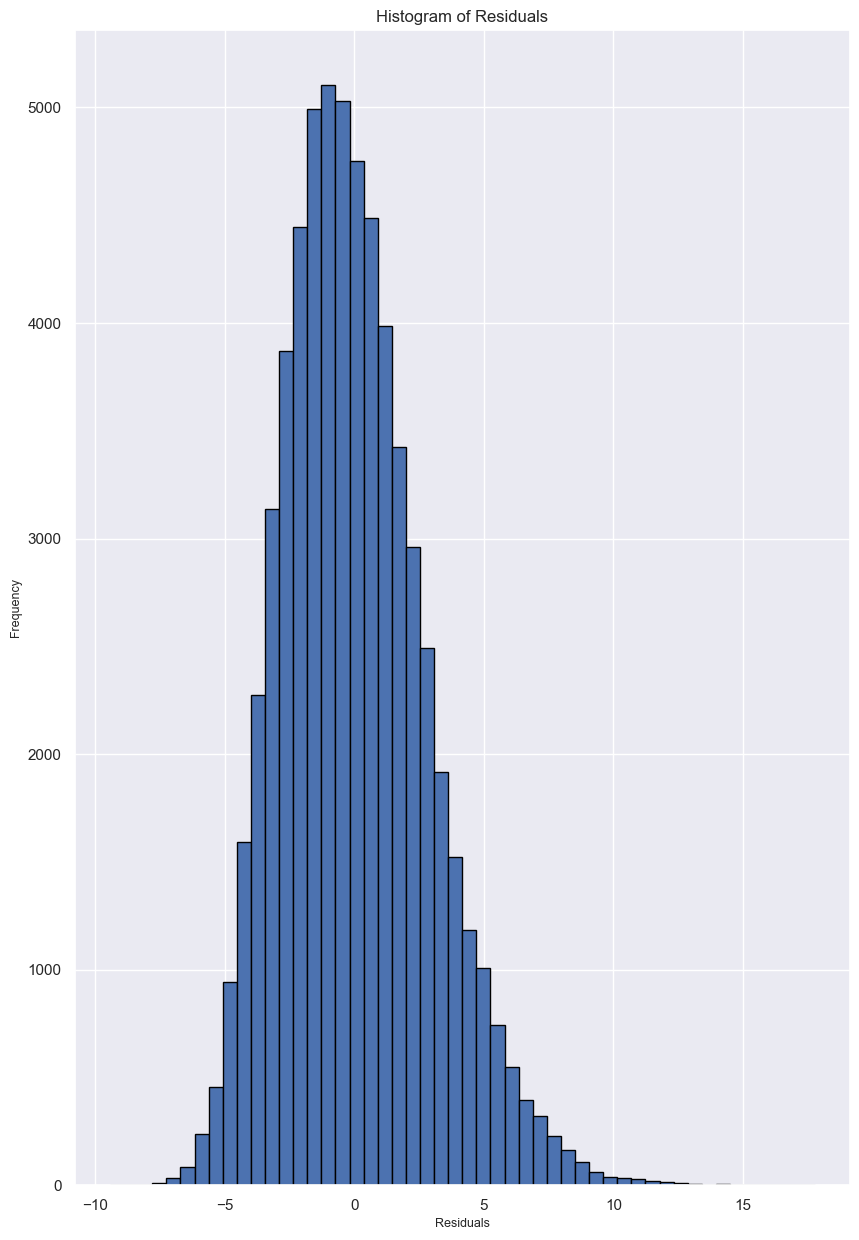

In [268]:
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

#### Quantile-quantile (Q-Q) plot to compare the distribution of the residuals against a poisson distribution. This can be helpful for identifying deviations from normality.

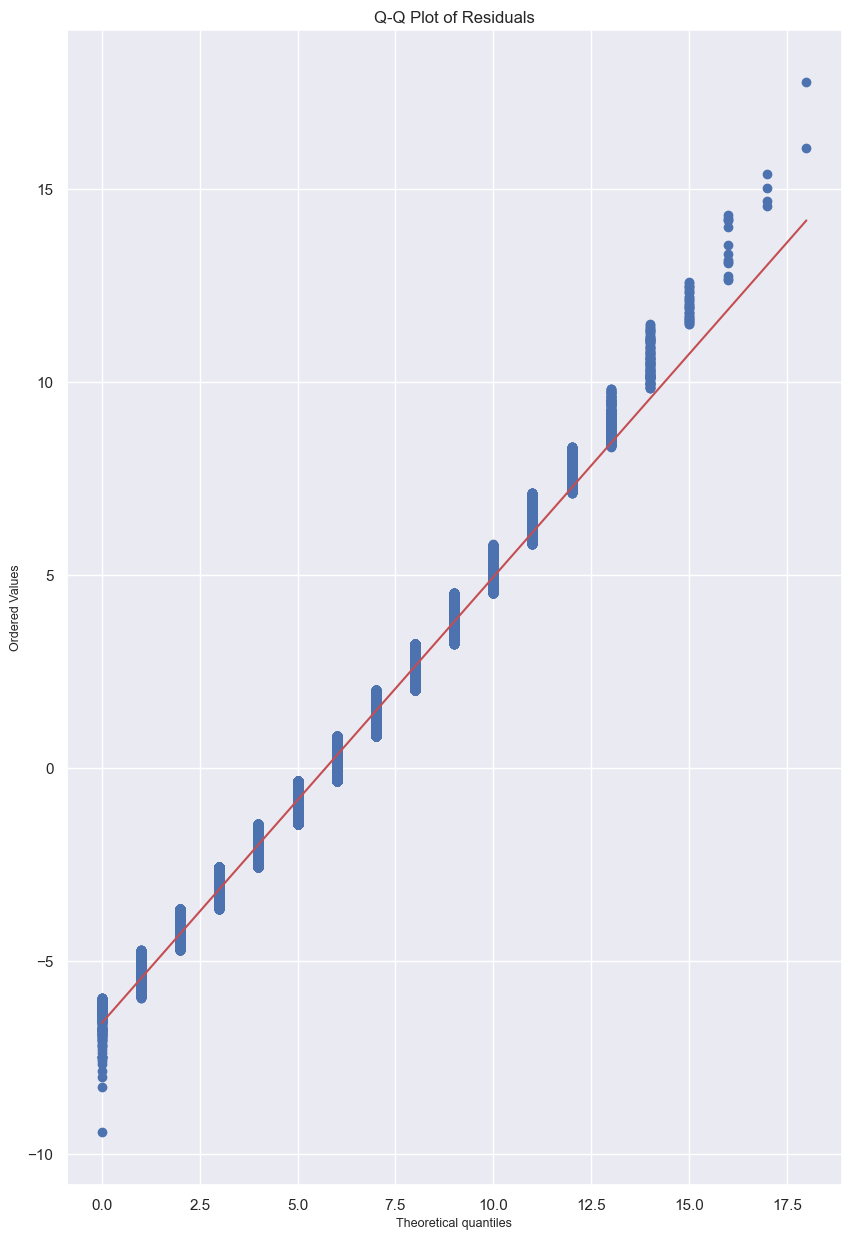

In [46]:
import scipy.stats as stats
sparams=(mu,)
stats.probplot(residuals, dist="poisson", sparams=(mu,), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

## vs normal
# stats.probplot(residuals, dist="poisson", plot=plt)
# plt.title('Q-Q Plot of Residuals')
# plt.show()

## _________________________________________________________________________________________________

#### Train_2 - Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 7.901308494177699
Root Mean Squared Error: 2.8109266255414243


In [53]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, y_pred_rf)
adjusted_r2_rf = 1 - (1 - r2_rf) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print('R2 RF value:', round(adjusted_r2_rf,3))

R2 RF value: 0.086


R2 score for random forest regression less favourable

#### Train_3 - Poisson regression using feature scaling

In [59]:
# Step 1: Standardize your features (Using Standard scaler instead of min-max)
from sklearn.preprocessing import StandardScaler

y_data = df['HC']
X_data = df[['HG_Exp',
             'AG_Exp', 
             'HomeT_HCf_Run_Av', 
             'HomeT_HCa_Run_Av',
             'HomeT_ACf_Run_Av', 
             'HomeT_ACa_Run_Av', 
             'AwayT_ACf_Run_Av', 
             'AwayT_ACa_Run_Av',
             'AwayT_HCf_Run_Av',
             'AwayT_HCa_Run_Av',
             'HC_Lg_Run_Av',
             'AC_Lg_Run_Av']]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_data)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_data, test_size=0.2, random_state=42)

In [61]:
# The sm.GLM class from statsmodels is used for generalized linear models, and we specify family=sm.families.Poisson() to indicate that we want a Poisson regression.
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Display the summary of the model
print(poisson_model.summary())

# Assess the model on the test set
y_pred_test = poisson_model.predict(X_test)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     HC   No. Observations:                50148
Model:                            GLM   Df Residuals:                    50136
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.6729e+05
Date:                Wed, 31 Jan 2024   Deviance:                   5.6156e+05
Time:                        09:22:22   Pearson chi2:                 2.07e+06
No. Iterations:                     6   Pseudo R-squ. (CS):         -1.541e+04
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0425      0.006     -6.817      0.0

Psuedo r2 is peculiar - ignore feature transformation for this user case

# ------------------------------------------------------------------------------
#### Lets try some techniques to capture the non-linearity of the extremes

#### 1. Generalized Additive Models (GAM):

GAMs allow for the inclusion of non-linear components using smooth functions, making them a flexible choice for capturing non-linearities.

In [63]:
from pygam import PoissonGAM

gam_model = PoissonGAM().fit(X_data, y_data)

In [66]:
# Calculate predicted values
y_pred = gam_model.predict(X_data)

# Calculate deviance
deviance_model = 2 * np.sum(y_data * np.log(y_data / y_pred) - (y_data - y_pred))
deviance_null = 2 * np.sum(y_data * np.log(y_data / np.mean(y_data)) - (y_data - np.mean(y_data)))

# Calculate pseudo R-squared
pseudo_r2 = 1 - (deviance_model / deviance_null)
print('Pseudo R2:', pseudo_r2)

Pseudo R2: 0.10512053497578766


C:\Users\MikeD\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### 2. Piecewise Linear/Non-linear Functions:

Instead of using a single linear function, consider breaking the range of a predictor into segments and fitting different linear/non-linear functions to each segment.
You can use step functions, splines, or other piecewise functions to capture changes in the relationship.
 - Use HG_Exp of 1.6 as the start-point for second linear poisson model

In [76]:
from pygam import PoissonGAM, s

threshold = 1.6
X_data['HG_Exp_spline'] = np.maximum(X_data['HG_Exp'] - threshold, 0)

In [80]:
# Select features for the model
features = ['HG_Exp_spline', 'AG_Exp', 'HomeT_HCf_Run_Av', 'HomeT_HCa_Run_Av',
            'HomeT_ACf_Run_Av', 'HomeT_ACa_Run_Av', 'AwayT_ACf_Run_Av',
            'AwayT_ACa_Run_Av', 'AwayT_HCf_Run_Av', 'AwayT_HCa_Run_Av',
            'HC_Lg_Run_Av', 'AC_Lg_Run_Av']

# Fit Poisson GAM with splines
gam_model = PoissonGAM(s(0, n_splines=5)).fit(X_data[features], y_data)


In [81]:
# Calculate deviance
deviance_model = 2 * np.sum(y_data * np.log(y_data / gam_model.predict(X_data[features])) - (y_data - gam_model.predict(X_data[features])))
deviance_null = 2 * np.sum(y_data * np.log(y_data / np.mean(y_data)) - (y_data - np.mean(y_data)))

# Calculate pseudo R-squared
pseudo_r2 = 1 - (deviance_model / deviance_null)
print('Pseudo R2:', pseudo_r2)

Pseudo R2: 0.043128813597632876


C:\Users\MikeD\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\MikeD\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Hard to know how well splining technique performs given the pseudo r2 score. 

# _______________________________________________________________________________________________

#### Repeat for AC using same features

In [269]:
df.corr()['AC'].sort_values()

HW_%               -0.245982
Sup Exp            -0.245511
Sup_scld_2.7       -0.236851
HG_Exp             -0.221378
HC                 -0.199175
AwayT_ACa_Run_Av   -0.068447
HomeT_HCf_Run_Av   -0.057079
HomeT_ACf_Run_Av   -0.054502
AwayT_HCa_Run_Av   -0.052715
FTHG               -0.028257
Exp                -0.020348
Ov2.5_%            -0.015377
TG                 -0.006513
Un2.5_%             0.015378
FTAG                0.022153
HC_Lg_Run_Av        0.065661
Proj_HC             0.076389
X_%                 0.086150
Proj_AC             0.102786
AwayT_ACf_Run_Av    0.137804
HomeT_HCa_Run_Av    0.142001
AwayT_HCf_Run_Av    0.142600
AC_Lg_Run_Av        0.145522
HomeT_ACa_Run_Av    0.147154
AG_Exp              0.245996
AW_%                0.246795
AC                  1.000000
Name: AC, dtype: float64

<AxesSubplot:>

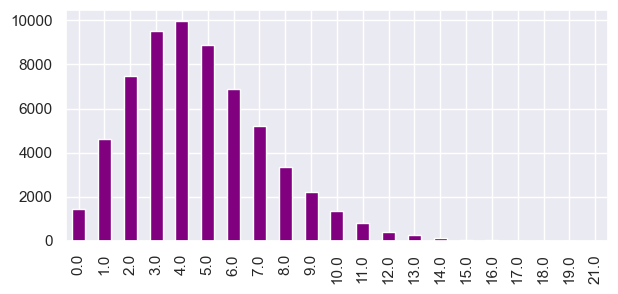

In [270]:
# show distribution of AC
df['AC'].value_counts().sort_index().plot(kind='bar', color='purple',figsize=(7, 3))

#### Visualize relationship between AC and AG_Exp using binned data and polynomial trend

In [72]:
# New df and bin the HG_Exp

df_agx_ac = df[['AC', 'AG_Exp']]

bin_width = 0.07
min_value = 0
max_value = 3.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df_agx_ac['AG_Exp_Bin'] = pd.cut(df_agx_ac['AG_Exp'], bins=bins, labels=labels, right=False, ordered=False)

# Ensure that 'AG_Exp_Bin' is converted to float 
df_agx_ac['AG_Exp_Bin'] = df_agx_ac['AG_Exp_Bin'].astype('float')

# Use groupby without resetting the index to avoid potential issues
group_df_agx_ac = df_agx_ac.groupby('AG_Exp_Bin', as_index=False)['AC'].mean()

# Use groupby without resetting the index to avoid potential issues
group_df_agx_ac = df_agx_ac.groupby('AG_Exp_Bin', as_index=False)['AC'].mean()

         2
-0.2928 x + 2.454 x + 2.147


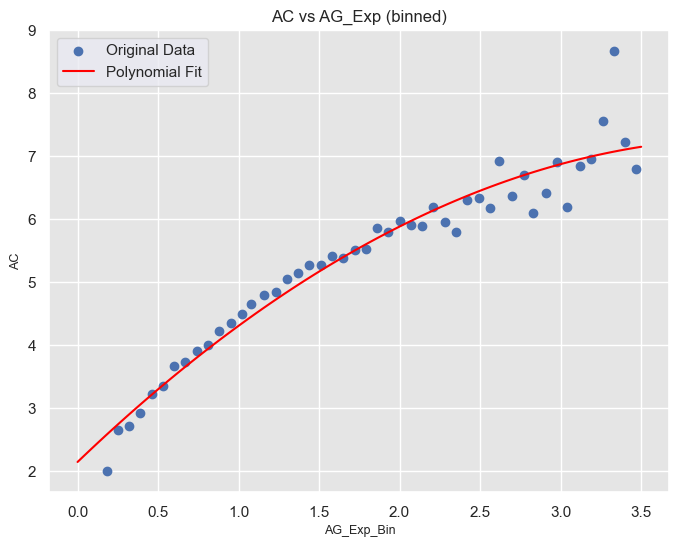

In [74]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0, 3.5, 80)
    y_new = model(x_new)

    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Scatter plot of the original data points
    plt.scatter(ind_var, dep_var, label='Original Data')

    # Plot the polynomial trendline
    plt.plot(x_new, y_new, label='Polynomial Fit', color='red')

    plt.title('AC vs AG_Exp (binned)')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    plt.xlabel(Name)
    plt.ylabel('AC')
    plt.legend()  # Show legend with labels

    plt.show()
    plt.close()
    
# Example usage
x = group_df_agx_ac['AG_Exp_Bin']
y = group_df_agx_ac['AC']

# declare poly degree
degree = 2

f = np.polyfit(x, y, degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function
PlotPolly(p, x, y, 'AG_Exp_Bin')

#### Model AC with Poisson Regression (best performing model) using reversed features selected for HC - using all the data
#### Train_1_AC_All_Data

In [271]:
y_data_A = df['AC']
X_data_A = df[['HG_Exp',
             'AG_Exp', 
             'HomeT_HCf_Run_Av', 
             'HomeT_HCa_Run_Av',
             'HomeT_ACf_Run_Av', 
             'HomeT_ACa_Run_Av', 
             'AwayT_ACf_Run_Av', 
             'AwayT_ACa_Run_Av',
             'AwayT_HCf_Run_Av',
             'AwayT_HCa_Run_Av',
             'HC_Lg_Run_Av',
             'AC_Lg_Run_Av']]

# Add a constant term to the design matrix
X_data_A = sm.add_constant(X_data_A)

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X_data_A, y_data_A, test_size=0.20, random_state=0)

y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

print('number of test samples :', X_test.shape[0])
print('number of training samples :', X_train.shape[0])

number of test samples : 12538
number of training samples : 50148


In [273]:
#import statsmodels.api as sm
#from sklearn.model_selection import train_test_split

# Fit the Poisson regression model on the training data
# The sm.GLM class from statsmodels is used for generalized linear models, and we specify family=sm.families.Poisson() to indicate that we want a Poisson regression.
poisson_model_A = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Display the summary of the model
print(poisson_model_A.summary())

# Assess the model on the test set
y_pred_test = poisson_model_A.predict(X_test)



                 Generalized Linear Model Regression Results                  
Dep. Variable:                     AC   No. Observations:                50148
Model:                            GLM   Df Residuals:                    50135
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1603e+05
Date:                Wed, 31 Jan 2024   Deviance:                       71153.
Time:                        16:18:53   Pearson chi2:                 6.83e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1237
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4785      0.036  

In [291]:
#import statsmodels.tools as sm_tools

# Input values
HG = 3.1
AG = 0.5
HTHCF = 7
HTHCa = 1.7
HTACf = 4.5
HTACa = 3.5
ATACf = 3.1
ATACa = 5
ATHCf = 4
ATHCa = 4
Lg_Av_HC = 4.6
Lg_Av_AC = 3.8

# Create a DataFrame with the input values
x_new_A = pd.DataFrame({'const':1, 
                      'HG_Exp': [HG], 
                      'AG_Exp': [AG], 
                      'HomeT_HCf_Run_Av': [HTHCF],
                      'HomeT_HCa_Run_Av': [HTHCa], 
                      'HomeT_ACf_Run_Av': [HTACf],
                      'HomeT_ACa_Run_Av' : [HTACa],                    
                      'AwayT_ACf_Run_Av' : [ATACf], 
                      'AwayT_ACa_Run_Av': [ATACa],
                      'AwayT_HCf_Run_Av': [ATHCf],
                      'AwayT_HCa_Run_Av': [ATHCa],
                      'HC_Lg_Run_Av': [Lg_Av_HC],
                      'AC_Lg_Run_Av' : [Lg_Av_AC]})


# Use the trained model to make predictions on the new data
predicted_AC = poisson_model_A.predict(x_new)

print('Predicted AC:', predicted_AC)

Predicted AC: 0    2.946574
dtype: float64


#### Train_AC_2 - AG_Exp > 0.7

In [295]:
### Create new df with rows where 'AG_Exp' is greater than 0.7
df_4 = df[df['AG_Exp'] > 0.7]
df_4.reset_index(drop=True, inplace=True)

# remove outliers where AC exceeds 3 sd
#from scipy.stats import zscore

# Calculate z-scores for 'AC'
z_scores = zscore(df_4['AC'])

# Define a threshold for z-scores (e.g., removing data points beyond 3 standard deviations)
threshold = 3

# Create a new DataFrame with outliers removed
df_4 = df_4[(z_scores > -threshold) & (z_scores < threshold)]

# Reset the index of the new DataFrame
df_4.reset_index(drop=True, inplace=True)

#Split data separating the independent and target variables
y_data_4 = df_4['AC']
X_data_4 = df_4[['HG_Exp',
             'AG_Exp', 
             'HomeT_HCf_Run_Av', 
             'HomeT_HCa_Run_Av',
             'HomeT_ACf_Run_Av', 
             'HomeT_ACa_Run_Av', 
             'AwayT_ACf_Run_Av', 
             'AwayT_ACa_Run_Av',
             'AwayT_HCf_Run_Av',
             'AwayT_HCa_Run_Av',
             'HC_Lg_Run_Av',
             'AC_Lg_Run_Av']]

# Add a constant term to the design matrix
X_data_4 = sm.add_constant(X_data_4)

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_data_4, y_data_4, test_size=0.20, random_state=0)

y_train_4 = y_train_4.reset_index(drop=True)
X_train_4 = X_train_4.reset_index(drop=True)

print('number of test samples :', X_test_4.shape[0])
print('number of training samples :', X_train_4.shape[0])

# Fit the Poisson regression model on the training data
# The sm.GLM class from statsmodels is used for generalized linear models, and we specify family=sm.families.Poisson() to indicate that we want a Poisson regression.
poisson_model_A2 = sm.GLM(y_train_4, X_train_4, family=sm.families.Poisson()).fit()

# Display the summary of the model
print(poisson_model_A2.summary())

# Assess the model on the test set
y_pred_test_4 = poisson_model_A2.predict(X_test_4)

number of test samples : 11128
number of training samples : 44512
                 Generalized Linear Model Regression Results                  
Dep. Variable:                     AC   No. Observations:                44512
Model:                            GLM   Df Residuals:                    44499
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0161e+05
Date:                Wed, 31 Jan 2024   Deviance:                       58902.
Time:                        16:54:08   Pearson chi2:                 5.54e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08151
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

In [296]:
#import statsmodels.tools as sm_tools

# Input values
HG = 3.1
AG = 0.5
HTHCF = 7
HTHCa = 1.7
HTACf = 4.5
HTACa = 3.5
ATACf = 3.1
ATACa = 5
ATHCf = 4
ATHCa = 4
Lg_Av_HC = 4.6
Lg_Av_AC = 3.8

# Create a DataFrame with the input values
x_new_1 = pd.DataFrame({'const':1, 
                      'HG_Exp': [HG], 
                      'AG_Exp': [AG], 
                      'HomeT_HCf_Run_Av': [HTHCF],
                      'HomeT_HCa_Run_Av': [HTHCa], 
                      'HomeT_ACf_Run_Av': [HTACf],
                      'HomeT_ACa_Run_Av' : [HTACa],                    
                      'AwayT_ACf_Run_Av' : [ATACf], 
                      'AwayT_ACa_Run_Av': [ATACa],
                      'AwayT_HCf_Run_Av': [ATHCf],
                      'AwayT_HCa_Run_Av': [ATHCa],
                      'HC_Lg_Run_Av': [Lg_Av_HC],
                      'AC_Lg_Run_Av' : [Lg_Av_AC]})


# Use the trained model to make predictions on the new data
predicted_AC_2 = poisson_model_A2.predict(x_new_1)

print('Predicted AC:', predicted_AC_2)

Predicted AC: 0    2.907835
dtype: float64


#### Train_AC_3 - AG_Exp < 0.7

In [277]:
### Create new df with rows where 'HG_Exp' is greater than 2
df_5 = df[df['AG_Exp'] < 0.8]
df_5.reset_index(drop=True, inplace=True)

# remove outliers where HC exceeds 3 sd
#from scipy.stats import zscore

# Calculate z-scores for 'HC'
z_scores = zscore(df_5['AC'])

# Define a threshold for z-scores (e.g., removing data points beyond 3 standard deviations)
threshold = 3

# Create a new DataFrame with outliers removed
df_5 = df_5[(z_scores > -threshold) & (z_scores < threshold)]

# Reset the index of the new DataFrame
df_5.reset_index(drop=True, inplace=True)

#Split data separating the independent and target variables
y_data_5 = df_5['AC']
X_data_5 = df_5[['HG_Exp',
             'AG_Exp', 
             'HomeT_HCf_Run_Av', 
             'HomeT_HCa_Run_Av',
             'HomeT_ACf_Run_Av', 
             'HomeT_ACa_Run_Av', 
             'AwayT_ACf_Run_Av', 
             'AwayT_ACa_Run_Av',
             'AwayT_HCf_Run_Av',
             'AwayT_HCa_Run_Av',
             'HC_Lg_Run_Av',
             'AC_Lg_Run_Av']]

# Add a constant term to the design matrix
X_data_5 = sm.add_constant(X_data_5)

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_data_5, y_data_5, test_size=0.20, random_state=0)

y_train_5 = y_train_5.reset_index(drop=True)
X_train_5 = X_train_5.reset_index(drop=True)

print('number of test samples :', X_test_5.shape[0])
print('number of training samples :', X_train_5.shape[0])

# Fit the Poisson regression model on the training data
# The sm.GLM class from statsmodels is used for generalized linear models, and we specify family=sm.families.Poisson() to indicate that we want a Poisson regression.
poisson_model_A3 = sm.GLM(y_train_5, X_train_5, family=sm.families.Poisson()).fit()

# Display the summary of the model
print(poisson_model_A3.summary())

# Assess the model on the test set
y_pred_test_5 = poisson_model_A3.predict(X_test_5)

number of test samples : 2023
number of training samples : 8090
                 Generalized Linear Model Regression Results                  
Dep. Variable:                     AC   No. Observations:                 8090
Model:                            GLM   Df Residuals:                     8077
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17431.
Date:                Wed, 31 Jan 2024   Deviance:                       11432.
Time:                        16:31:04   Pearson chi2:                 1.06e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.06331
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

In [290]:
# Input values
HG = 3.1
AG = 0.5
HTHCF = 7
HTHCa = 1.7
HTACf = 4.5
HTACa = 3.5
ATACf = 3.1
ATACa = 5
ATHCf = 4
ATHCa = 4
Lg_Av_HC = 4.6
Lg_Av_AC = 3.8

# Create a DataFrame with the input values
x_new_A = pd.DataFrame({'const':1, 
                      'HG_Exp': [HG], 
                      'AG_Exp': [AG], 
                      'HomeT_HCf_Run_Av': [HTHCF],
                      'HomeT_HCa_Run_Av': [HTHCa], 
                      'HomeT_ACf_Run_Av': [HTACf],
                      'HomeT_ACa_Run_Av' : [HTACa],                    
                      'AwayT_ACf_Run_Av' : [ATACf], 
                      'AwayT_ACa_Run_Av': [ATACa],
                      'AwayT_HCf_Run_Av': [ATHCf],
                      'AwayT_HCa_Run_Av': [ATHCa],
                      'HC_Lg_Run_Av': [Lg_Av_HC],
                      'AC_Lg_Run_Av' : [Lg_Av_AC]})


# Use the trained model to make predictions on the new data
predicted_AC_3 = poisson_model_A3.predict(x_new_A)

print('Predicted HC:', predicted_AC_3)

Predicted HC: 0    2.68122
dtype: float64


In [297]:
# Input values
HG = 3.1
HTHCF = 7
HTHCa = 1.8
HTACf = 5.2
HTACa = 3
ATACf = 3.1
ATACa = 5.5
ATHCf = 4
ATHCa = 4.5
Lg_Av_HC = 4.6
Lg_Av_AC = 3.8

# Create a DataFrame with the input values
x_df_a = pd.DataFrame({'const': 1, 
                     'HG_Exp': [HG], 
                     'AG_Exp': [AG], 
                     'HomeT_HCf_Run_Av': [HTHCF],
                     'HomeT_HCa_Run_Av': [HTHCa], 
                     'HomeT_ACf_Run_Av': [HTACf],
                     'HomeT_ACa_Run_Av': [HTACa],                    
                     'AwayT_ACf_Run_Av': [ATACf], 
                     'AwayT_ACa_Run_Av': [ATACa],
                     'AwayT_HCf_Run_Av': [ATHCf],
                     'AwayT_HCa_Run_Av': [ATHCa],
                     'HC_Lg_Run_Av': [Lg_Av_HC],
                     'AC_Lg_Run_Av': [Lg_Av_AC]})

# Loop through different values of 'HG_Exp'
for ag in np.arange(0.2, 0.9, 0.1):
    # Update the 'AG_Exp' column in the DataFrame
    x_df_a['AG_Exp'] = ag
    
    # Use the trained model to make predictions on the new data
    predicted_AC_1 = poisson_model_A.predict(x_df_a)
    predicted_AC_2 = poisson_model_A2.predict(x_df_a)
    predicted_AC_3 = poisson_model_A3.predict(x_df_a)
    
    print(f'Pred AC_1 for AG_{round(ag,1)}: {round(predicted_AC_1,2)}')
    print(f'Pred AC_2 for AG_{round(ag,1)}: {round(predicted_AC_2,2)}')
    print(f'Pred AC_3 for AG_{round(ag,1)}: {round(predicted_AC_3,2)}')
    print("-------------------")

Pred AC_1 for AG_0.2: 0    2.57
dtype: float64
Pred AC_2 for AG_0.2: 0    2.72
dtype: float64
Pred AC_3 for AG_0.2: 0    2.25
dtype: float64
-------------------
Pred AC_1 for AG_0.3: 0    2.61
dtype: float64
Pred AC_2 for AG_0.3: 0    2.76
dtype: float64
Pred AC_3 for AG_0.3: 0    2.35
dtype: float64
-------------------
Pred AC_1 for AG_0.4: 0    2.65
dtype: float64
Pred AC_2 for AG_0.4: 0    2.8
dtype: float64
Pred AC_3 for AG_0.4: 0    2.46
dtype: float64
-------------------
Pred AC_1 for AG_0.5: 0    2.69
dtype: float64
Pred AC_2 for AG_0.5: 0    2.84
dtype: float64
Pred AC_3 for AG_0.5: 0    2.57
dtype: float64
-------------------
Pred AC_1 for AG_0.6: 0    2.74
dtype: float64
Pred AC_2 for AG_0.6: 0    2.88
dtype: float64
Pred AC_3 for AG_0.6: 0    2.69
dtype: float64
-------------------
Pred AC_1 for AG_0.7: 0    2.78
dtype: float64
Pred AC_2 for AG_0.7: 0    2.92
dtype: float64
Pred AC_3 for AG_0.7: 0    2.81
dtype: float64
-------------------
Pred AC_1 for AG_0.8: 0    2.83
dty

In [298]:
print("Model 1 (AC) Coefficients:")
print(poisson_model_A.params)

print("Model 2 (AC) Coefficients:")
print(poisson_model_A2.params)

print("\nModel 3 (AC) Coefficients:")
print(poisson_model_A3.params)

Model 1 (AC) Coefficients:
const               0.478495
HG_Exp             -0.081756
AG_Exp              0.160354
HomeT_HCf_Run_Av    0.000915
HomeT_HCa_Run_Av    0.017257
HomeT_ACf_Run_Av   -0.010720
HomeT_ACa_Run_Av    0.024950
AwayT_ACf_Run_Av    0.010385
AwayT_ACa_Run_Av   -0.000603
AwayT_HCf_Run_Av    0.022404
AwayT_HCa_Run_Av   -0.008478
HC_Lg_Run_Av       -0.033994
AC_Lg_Run_Av        0.185651
dtype: float64
Model 2 (AC) Coefficients:
const               0.545040
HG_Exp             -0.067597
AG_Exp              0.140656
HomeT_HCf_Run_Av    0.001508
HomeT_HCa_Run_Av    0.013007
HomeT_ACf_Run_Av   -0.011944
HomeT_ACa_Run_Av    0.023479
AwayT_ACf_Run_Av    0.010636
AwayT_ACa_Run_Av   -0.000943
AwayT_HCf_Run_Av    0.019958
AwayT_HCa_Run_Av   -0.010985
HC_Lg_Run_Av       -0.035678
AC_Lg_Run_Av        0.184332
dtype: float64

Model 3 (AC) Coefficients:
const               0.042404
HG_Exp              0.010509
AG_Exp              0.447215
HomeT_HCf_Run_Av   -0.001254
HomeT_HCa_Run_Av  